In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

import matplotlib.image as mpimg

image = mpimg.imread('/Users/giacomo/Desktop/Prova parametri immagine/2.jpg')

In [7]:
def change_hog(orient, n_pixel, cell_per_block):

    fd, hog_image = hog(image, orientations=orient, pixels_per_cell=(n_pixel,n_pixel),
                        cells_per_block=(cell_per_block, cell_per_block),block_norm = "L1", visualize=True, channel_axis=-1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

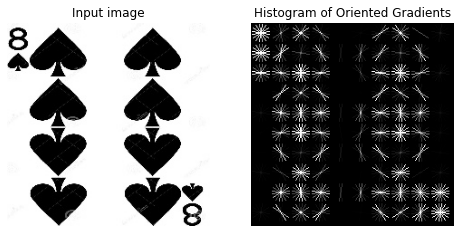

In [8]:
change_hog(8, 22, 1)

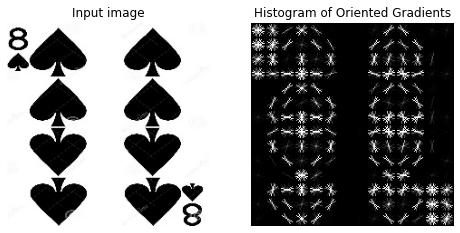

In [9]:
change_hog(8, 16, 1)

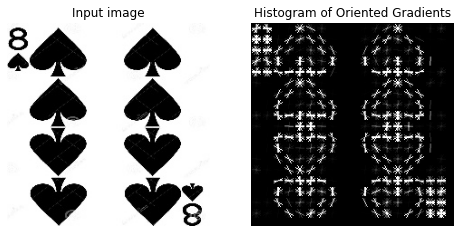

In [10]:
change_hog(8, 12, 1)

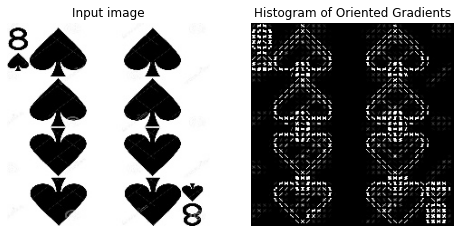

In [11]:
change_hog(8, 6, 1)

In [45]:
import inspect

In [47]:
print(inspect.getsource(hog)) #documentation of hog

@utils.channel_as_last_axis(multichannel_output=False)
@utils.deprecate_multichannel_kwarg(multichannel_position=8)
def hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3),
        block_norm='L2-Hys', visualize=False, transform_sqrt=False,
        feature_vector=True, multichannel=None, *, channel_axis=None):
    """Extract Histogram of Oriented Gradients (HOG) for a given image.

    Compute a Histogram of Oriented Gradients (HOG) by

        1. (optional) global image normalization
        2. computing the gradient image in `row` and `col`
        3. computing gradient histograms
        4. normalizing across blocks
        5. flattening into a feature vector

    Parameters
    ----------
    image : (M, N[, C]) ndarray
        Input image.
    orientations : int, optional
        Number of orientation bins.
    pixels_per_cell : 2-tuple (int, int), optional
        Size (in pixels) of a cell.
    cells_per_block : 2-tuple (int, int), optional
        Number o